#Week 6: Day 3 – Regularised Regression

# The Best Guide to Regularization in Machine Learning

In [ ]:
# Importing the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# loading Pre-defined Boston Dataset
boston_dataset = datasets.load_boston()

In [ ]:
# load the dataset into a dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target) # The asarray() function is used to convert an given input to an array.
boston_pd['House Price'] = pd.Series(boston_pd_target)

# input variables
X=boston_pd.iloc[:, :-1]

# output variables
Y=boston_pd.iloc[:, -1]
print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [ ]:
# Splitting our data into train and test set
x_train,x_test,y_train,y_test=train_test_split(boston_pd.iloc[:, :-1],boston_pd.iloc[:,-1],test_size = 0.25)

print('Train data shape of X = % s and Y = % s : '%(x_train.shape, y_train.shape))

print('Train data shape of X = % s and Y = % s : '%(x_test.shape, y_test.shape))


Train data shape of X = (379, 13) and Y = (379,) : 
Train data shape of X = (127, 13) and Y = (127,) : 


In [ ]:
# Initiating and fitting the linear regression model
lreg = LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [ ]:
# generate predictions on test set
lreg_y_pred=lreg.predict(x_test)

In [ ]:
# calculate the mean sqaured error (mse)
mean_squared_error= np.mean((lreg_y_pred - y_test)**2)
print('Mean Squared Error on test set : ',mean_squared_error)

Mean Squared Error on test set :  25.62869226824483


In [ ]:
# putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient['columns']= x_train.columns
lreg_coefficient['Coefficient Estimate ']=pd.Series(lreg.coef_)
print(lreg_coefficient)

    columns  Coefficient Estimate 
0      CRIM              -0.107303
1        ZN               0.066776
2     INDUS              -0.014846
3      CHAS               0.749690
4       NOX             -19.325576
5        RM               3.688956
6       AGE              -0.003322
7       DIS              -1.678546
8       RAD               0.345373
9       TAX              -0.013338
10  PTRATIO              -0.991254
11        B               0.009876
12    LSTAT              -0.456256


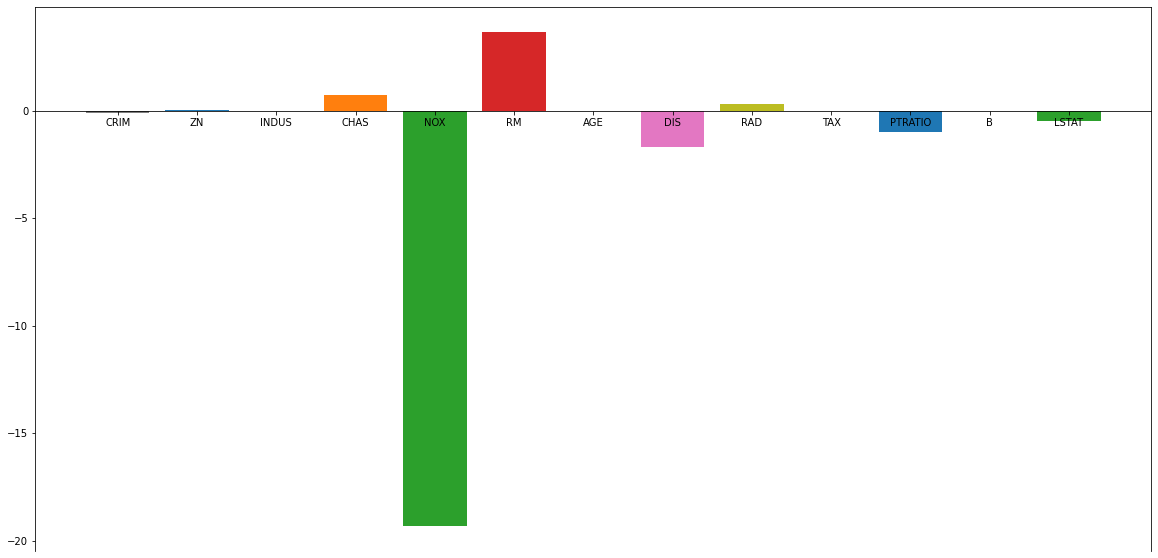

In [ ]:
# plotting the coefficient score
fig, ax=plt.subplots(figsize=(20,10))

color=['tab:gray','tab:blue','tab:purple','tab:orange',
'tab:green','tab:red','tab:brown','tab:pink','tab:olive',
'tab:cyan','tab:blue','tab:olive','tab:green']

ax.bar(lreg_coefficient['columns'],lreg_coefficient['Coefficient Estimate '],color=color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

### Now our motive is to reduse the coefficient score
# Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where linearly independent variables are highly correlated.

In [ ]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

In [ ]:
# train the model and generate a prediction for it
ridgeR = Ridge(alpha=1)
ridgeR.fit(x_train,y_train)
y_pred = ridgeR.predict(x_test)

In [ ]:
# calculate mean square error
mean_squared_error_ridge= np.mean((y_pred - y_test)**2)
print('Mean Squared Error on test set : ',mean_squared_error_ridge)

Mean Squared Error on test set :  25.783910765563146


In [ ]:
# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient['columns']= x_train.columns
ridge_coefficient['Coefficeient Estimate ']=pd.Series(ridgeR.coef_)
print(ridge_coefficient)

    columns  Coefficeient Estimate 
0      CRIM               -0.104143
1        ZN                0.068481
2     INDUS               -0.052220
3      CHAS                0.528454
4       NOX              -10.276622
5        RM                3.717200
6       AGE               -0.010788
7       DIS               -1.541072
8       RAD                0.332456
9       TAX               -0.014365
10  PTRATIO               -0.900027
11        B                0.010627
12    LSTAT               -0.465616


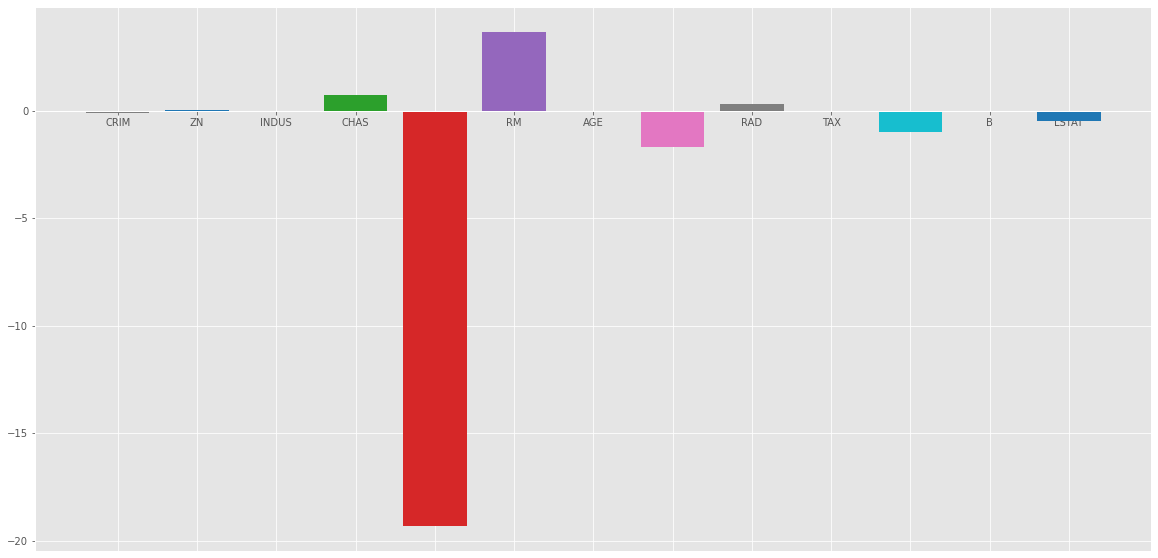

In [ ]:
# plot a subplot of the dataset
fig, ax=plt.subplots(figsize=(20,10))

color=['tab:gray','tab:blue','tab:orange',
'tab:green','tab:red','tab:purple','tab:brown',
'tab:pink','tab:gray','tab:olive','tab:cyan',
'tab:orange','tab:blue','tab:olive','tab:green']

ax.bar(lreg_coefficient['columns'],
lreg_coefficient['Coefficient Estimate '],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

### Lasso Regression

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

In [ ]:
# import lesso regression from sklearn library
from sklearn.linear_model import Lasso

In [ ]:
# train the model
lasso = Lasso(alpha=1)
lasso.fit(x_train,y_train)
y_pred1 = lasso.predict(x_test)

In [ ]:
# calculate mean sqaure error (mse)
mean_squared_error= np.mean((y_pred1 - y_test)**2)
print('Mean Squared Error on test set : ',mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff['columns']= x_train.columns
lasso_coeff['Coefficeient Estimate ']=pd.Series(lasso.coef_)
print(lasso_coeff)

Mean Squared Error on test set :  30.11618680413223
    columns  Coefficeient Estimate 
0      CRIM               -0.054901
1        ZN                0.072950
2     INDUS               -0.018926
3      CHAS                0.000000
4       NOX               -0.000000
5        RM                1.023453
6       AGE                0.012904
7       DIS               -0.738935
8       RAD                0.287766
9       TAX               -0.015839
10  PTRATIO               -0.743334
11        B                0.009317
12    LSTAT               -0.666320
